# Load libraries and Datasets

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "./data_files/"

In [3]:
csv_data_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".csv")]
txt_data_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".txt")]

In [4]:
# data dict 'key'  : data_file_name_without_extension
# data dict 'value': dataframe of data_file 
data = {fname.rsplit("/")[-1].rsplit(".")[0] # Key
        :pd.read_csv(fname) for fname in csv_data_files # Value
       }

**Available keys(datasets) in data dictionary:**
1. `ap_2010`
2. `graduation`
3. `sat_results`
4. `class_size`
5. `demographics`
6. `hs_directory`

You can access the associated dataframe of a particular dataset by using one of the dataset names from above list, as **`data[dataset_name]`**.

We are mainly interested in SAT dataset. ie. `data[sat_results]` dataframe.

In [5]:
# Let's explore sat scores' dataframe
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


We can make a few observations based on this output:

- The DBN appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg., Score SAT Math Avg. Score, and SAT Writing Avg. Score -- into a single column to make the scores easier to analyze.

**Let's explore all other datasets.**

In [6]:
# 1. Advanced Placement dataset
print(data['ap_2010'].shape)
data['ap_2010'].sample(5)

(258, 5)


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
67,07X520,FOREIGN LANG ACAD/GLOBAL STUD,13,13,12
130,11X542,Pelham Preparatory Academy,46,57,17
138,13K265,Dr Susan S McKinney Secondary School of the Arts,17,22,s
244,30Q555,NEWCOMERS HS:ACAD AMER STD,119,163,140
215,26Q430,FRANCIS LEWIS HS,697,1033,583


In [7]:
pd.__version__

'0.23.4'

In [8]:
pd.set_option("display.max_columns",None)
# pd.set_option("dispaly.max_colwidth",-1)

In [9]:
# 2. Graduation outcomes dataset
print(data['graduation'].shape)
data['graduation'].head()

(25096, 23)


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,0,0%,0%,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,0,0%,0%,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,0,0%,0%,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [10]:
# 3. sat results - DONE
# 4. class sizes
print(data['class_size'].shape)
data['class_size'].head()

(27611, 16)


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [11]:
# 5. demographics
print(data['demographics'].shape)
data['demographics'].head()

(10075, 38)


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [12]:
# 6. Highschool directory
print(data['hs_directory'].shape)
data['hs_directory'].head()

(435, 58)


,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399.0,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Baseball, Basketball & JV Basketball, Cross Co...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378.0,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Baseball, Basketball & JV Basketball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543.0,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,NaN,"As we expand, we plan to offer PSAL sports.",New Settlement Community Center,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby blue button...,NaN,8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx stud

In [13]:
# Reading in txt survey files
all_survey = {fname.rsplit("/")[-1].rsplit(".")[0] # Key
              :pd.read_csv(fname, delimiter="\t", encoding="windows-1252") for fname in txt_data_files # Value
             }

In [14]:
# Combine all survey dataframes into one.
survey = pd.concat(list(all_survey.values()), axis=0)
survey.head()

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11  com_t_11  com_tot_11  d75     dbn  eng_p_11  eng_s_11  \
0       7.6       NaN       7.8         7.7    0  01M015       7.5       NaN   
1       7.6       NaN       8.5         8.1    0  01M019       7.6       NaN   
2       8.3       NaN       6.3         7.3    0  01M020       8.3       NaN   
3       8.2       5.9       6.2         6.7    0  01M034       8.0       6.5   
4       7.9       NaN       7.3         7.6    0  01M063       8.1       NaN   

   eng_t_11  eng_tot_11  highschool  nr_p  nr_s  nr_t  p_N_q10a  p_N_q10a_1  \
0       7.6         7.5         0.0   150     0    25      56.0         NaN   
1       8.9         8.2         0.0   269     0    33      76.0         NaN   
2       6.8         7.5         0.0   505     0    48     176.0         NaN   
3       6.8         7.1         0.0   301   163    40      95.0         NaN   
4       7.8         7.9         0.0   151     0    23      45.0         NaN   

   p_N_q10a_2  p_N_q10a_3  p_N_q10a_4  p_N_q10a_5  p_N_q10b  p_N_q10b_1  \
0         NaN         NaN         NaN         NaN      30.0         NaN   
1         NaN         NaN         NaN         NaN     105.0         NaN   
2         NaN         NaN         NaN         NaN     173.0         NaN   
3         NaN         NaN         NaN         NaN      74.0         NaN   
4         NaN         NaN         NaN         NaN      54.0         NaN   

   p_N_q10b_2  p_N_q10b_3  p_N_q10b_4  p_N_q10b_5  p_N_q10c  p_N_q10c_1  \
0         NaN         NaN         NaN         NaN       6.0         NaN   
1         NaN         NaN         NaN         NaN      22.0         NaN   
2         NaN         NaN         NaN         NaN      40.0         NaN   
3         NaN         NaN         NaN         NaN      19.0         NaN   
4         NaN         NaN         NaN         NaN      13.0         NaN   

   p_N_q10c_2  p_N_q10c_3  p_N_q10c_4  p_N_q10c_5  p_N_q10d  p_N_q10d_1  \
0         NaN         NaN         NaN         NaN      49.0         NaN   
1         NaN         NaN         NaN         NaN      99.0         NaN   
2         NaN         NaN         NaN         NaN     219.0         NaN   
3         NaN         NaN         NaN         NaN      79.0         NaN   
4         NaN         NaN         NaN         NaN      57.0         NaN   

   p_N_q10d_2  p_N_q10d_3  p_N_q10d_4  p_N_q10d_5  p_N_q10e  p_N_q10e_1  \
0         NaN         NaN         NaN         NaN       3.0         NaN   
1         NaN         NaN         NaN         NaN      23.0         NaN   
2         NaN         NaN         NaN         NaN      43.0         NaN   
3         NaN         NaN         NaN         NaN      17.0         NaN   
4         NaN         NaN         NaN         NaN      14.0         NaN   

   p_N_q10e_2  p_N_q10e_3  p_N_q10e_4  p_N_q10e_5  p_N_q10f  p_N_q10f_1  \
0         NaN         NaN         NaN         NaN       2.0         NaN   
1         NaN         NaN         NaN         NaN      16.0         NaN   
2         NaN         NaN         NaN         NaN      36.0         NaN   
3         NaN         NaN         NaN         NaN      15.0         NaN   
4         NaN         NaN         NaN         NaN      13.0         NaN   

   p_N_q10f_2  p_N_q10f_3  p_N_q10f_4  p_N_q10f_5  p_N_q10g  p_N_q10h  \
0         NaN         NaN         NaN         NaN      56.0      11.0   
1         NaN         NaN         NaN         NaN      75.0      33.0   
2         NaN         NaN         NaN         NaN     210.0      65.0   
3         NaN         NaN         NaN         NaN     102.0    

### Survey data dictionary

** Importatn column definitions.**
- Useful to us column names are highlighted in red.
- Not so useful column names are grayed out.

<table>
<tr><td><b>Field Name</b></td><td><b>Field Description</b></td></tr>
<tr><td style='color:red;'>dbn</td> <td>School identification code (district borough number)</td></tr>
<tr style='color:gray;'><td>sch_type</td> <td>School type (Elementary, Middle, High, etc)</td></tr>
<tr style='color:gray;'><td>location</td> <td>School name</td></tr>
<tr style='color:gray;'><td>enrollment</td> <td>Enrollment size</td></tr>
<tr style='color:gray;'><td>borough</td> <td>Borough</td></tr>
<tr style='color:gray;'><td>principal</td> <td>Principal name</td></tr>
<tr style='color:gray;'><td>studentsurvey</td> <td><p>Only students in grades 6-12 partipate in the student survey.This field indicates whether or not this school serves any students in grades 6-12.</p></td></tr>
<tr><td style='color:red;'>rr_s</td> <td>Student Response Rate</td></tr>
<tr><td style='color:red;'>rr_t</td> <td>Teacher Response Rate</td></tr>
<tr><td style='color:red;'>rr_p</td> <td>Parent Response Rate</td></tr>
<tr><td style='color:red;'>N_s</td> <td>Number of student respondents</td></tr>
<tr><td style='color:red;'>N_t</td> <td>Number of teacher respondents</td></tr>
<tr><td style='color:red;'>N_p</td> <td>Number of parent respondents</td></tr>
<tr style='color:gray;'><td>nr_s</td> <td>Number of eligible students</td></tr>
<tr style='color:gray;'><td>nr_t</td> <td>Number of eligible teachers</td></tr>
<tr style='color:gray;'><td>nr_p</td> <td>Number of eligible parents</td></tr>
<tr><td style='color:red;'>saf_p_11</td> <td>Safety and Respect score based on parent responses</td></tr>
<tr><td style='color:red;'>com_p_11</td> <td>Communication score based on parent responses</td></tr>
<tr><td style='color:red;'>eng_p_11</td> <td>Engagement score based on parent responses</td></tr>
<tr><td style='color:red;'>aca_p_11</td> <td>Academic expectations score based on parent responses</td></tr>
<tr><td style='color:red;'>saf_t_11</td> <td>Safety and Respect score based on teacher responses</td></tr>
<tr><td style='color:red;'>com_t_11</td> <td>Communication score based on teacher responses</td></tr>
<tr><td style='color:red;'>eng_t_11</td> <td>Engagement score based on teacher responses</td></tr>
<tr><td style='color:red;'>aca_t_11</td> <td>Academic expectations score based on teacher responses</td></tr>
<tr><td style='color:red;'>saf_s_11</td> <td>Safety and Respect score based on student responses</td></tr>
<tr><td style='color:red;'>com_s_11</td> <td>Communication score based on student responses</td></tr>
<tr><td style='color:red;'>eng_s_11</td> <td>Engagement score based on student responses</td></tr>
<tr><td style='color:red;'>aca_s_11</td> <td>Academic expectations score based on student responses</td></tr>
<tr><td style='color:red;'>saf_tot_11</td> <td>Safety and Respect total score</td></tr>
<tr><td style='color:red;'>com_tot_11</td> <td>Communication total score</td></tr>
<tr><td style='color:red;'>eng_tot_11</td> <td>Engagement total score</td></tr>
<tr><td style='color:red;'>aca_tot_11</td> <td>Academic Expectations total score</td></tr>

<tr><td><b>Field Convention</b></td> <td><b>Field Convention Description</b></td></tr>
<tr style='color:gray;'><td>p_q1</td> <td>Indicates parent_question 1</td></tr>
<tr style='color:gray;'><td>p_q1a</td> <td>Indicates parent_question 1a</td></tr>
<tr style='color:gray;'><td>p_q1a_1</td> <td>Indicates parent question_1a_response option 1</td></tr>
<tr style='color:gray;'><td>p_N_q1_1</td> <td>Indicates parent_Number of responses_question 1_response option 1</td></tr>
<tr style='color:gray;'><td>t_q1</td> <td>Indicates teacher_question 1</td></tr>
<tr style='color:gray;'><td>t_q1a</td> <td>Indicates teacher_question 1a</td></tr>
<tr style='color:gray;'><td>t_q1a_1</td> <td>Indicates teacher question_1a_response option 1</td></tr>
<tr style='color:gray;'><td>t_N_q1_1</td> <td>Indicates teacher_Number of responses_question 1_response option 1</td></tr>
<tr style='color:gray;'><td>s_q1</td> <td>Indicates student_question 1</td></tr>
<tr style='color:gray;'><td>s_q1a</td> <td>Indicates student_question 1a</td></tr>
<tr style='color:gray;'><td>s_q1a_1</td> <td>Indicates student question_1a_response option 1</td></tr>
<tr style='color:gray;'><td>s_N_q1_1</td> <td>Indicates student_Number of responses_question 1_response option 1</td></tr>
</table>

In [15]:
# The are over 2000 columns. But according to survey data dictionary we need only following columns.
cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11",
        "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11",
        "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

# Make new column with capital 'dbn' for later data combining purpose.
survey['DBN'] = survey['dbn']

# Extract only the essential columns and add the survey-dataframe to our all-data dictionary
survey = survey[cols]

# Add survey dataframe to data-dictionary
data['survey'] = survey

# Let's check the shape of new survey dataframe
data['survey'].shape

(1702, 23)

In [16]:
data['sat_results'].sample(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
227,12X248,"METROPOLITAN HIGH SCHOOL, THE",49,347,367,341
185,10X284,BRONX SCHOOL OF LAW AND FINANCE,54,402,395,385
331,19K420,FRANKLIN K. LANE HIGH SCHOOL,s,s,s,s
71,02M625,HIGH SCHOOL OF GRAPHIC COMMUNICATION ARTS,191,395,382,376
362,21K728,LIBERATION DIPLOMA PLUS,10,411,369,373


In [17]:
data['class_size'].head(5)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


There's no **DBN** column in the `class_size` dataframe. But we can construct one using the **CSD** and **SCHOOL CODE**.

**DBN** code is just the 0 padded to single digit **CSD** code and then followed by **SCHOOL CODE**.

example: CDS: 1 and School Code: M015 will make up DBN to be 01M015

In [18]:
# First let's add 'DBN' column to data['hs_directory'] dataset using the already present 'dbn' column
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# The DBN column is made in following way:
# 1. type cast CSD to str
# 2. CSD.zfill(2)
# 3. add CSD.zfill(2) and SCHOOL CODE
# 4. assign the new series to DBN column
data['class_size']['DBN'] = (data['class_size'][['CSD', 'SCHOOL CODE']]
                                 .apply(lambda x: str(x['CSD']).zfill(2) + x['SCHOOL CODE'], axis=1))
data['class_size']['DBN'].head(10)

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
5    01M015
6    01M015
7    01M015
8    01M015
9    01M015
Name: DBN, dtype: object

In [19]:
# Let's check if DBN column is created in data['hs_directory'] df.
data['hs_directory']['DBN'].head(5)

0    17K548
1    09X543
2    09X327
3    02M280
4    28Q680
Name: DBN, dtype: object

In [20]:
# Let's look at data['class_size'] df again to ensure about DBN column
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [21]:
# GREAT. So far so GOOD!!

#### Now, since we have got 'DBN' column in all the dataframes in data-dictionary, we're ready to combine all of our data.

In [22]:
# Before that.
# SAT_results dataframe have three different columns for 3-different avg scores. Let us combine them into one.
# Columns concerned are last three in the dataframe.
cols = data['sat_results'].columns[-3:]

# for each column, type cast the column to numeric
for col in cols:
    data['sat_results'][col] = pd.to_numeric(data['sat_results'][col], errors='coerce')

# Now add these columns together and assign to new column 'sat_score'
data['sat_results']['sat_score'] = data['sat_results'][cols].apply(sum, axis=1)

data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [23]:
# Extracting latitude and longitude from the 'Location 1' column of data['hs_directory'] dataframe.
pd.set_option('display.max_colwidth',-1)
data['hs_directory']['Location 1'].head()

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)    
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)          
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)      
3    411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)      
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)
Name: Location 1, dtype: object

In [24]:
def extract_latlong(item):
    if len(item):
        return pd.to_numeric(pd.Series(item[0].split(",")), errors='coerce')
    else:
        return pd.Series([])

In [25]:
data['hs_directory'][['lat', 'lon']] = (data['hs_directory']['Location 1']
                                        .str.findall(r"\((.+)\)")
                                        .apply(extract_latlong)
                                        .iloc[:,-2:]
                                       )
data['hs_directory'][['lat','lon', 'Location 1']].head()

,lat,lon,Location 1
0,40.670299,-73.961648,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)"
1,40.827603,-73.904475,"1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"
2,40.842414,-73.916162,"1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)"
3,40.710679,-74.000807,"411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)"
4,40.718810,-73.806500,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)"


In [26]:
data['hs_directory'][['lat','lon', 'Location 1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 3 columns):
lat           435 non-null float64
lon           435 non-null float64
Location 1    435 non-null object
dtypes: float64(2), object(1)
memory usage: 10.3+ KB


**So we have successfully extracted the latitude and longitude values from the '`Location 1`' column and added two new corresponding columns to the dataframe.**

### Class Size dataset

In [27]:
data['class_size'].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')

- **Grade column**

In [28]:
# Unique values in grade column
data['class_size']['GRADE '].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

**Since we're dealing with high school, we are only concerned with grades 9 through 12. Hence we will pick only rows where `GRADE ` column has value `09-12`.**

- **Program Type column**

In [29]:
print("Unique Values: ", data['class_size']['PROGRAM TYPE'].unique())
print(data['class_size']['PROGRAM TYPE'].value_counts(dropna=False))

Unique Values:  ['GEN ED' 'CTT' 'SPEC ED' nan 'G&T']
GEN ED     14545
CTT        7460 
SPEC ED    3653 
NaN        1484 
G&T        469  
Name: PROGRAM TYPE, dtype: int64


**Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where `PROGRAM TYPE` is `GEN ED`.**

In [30]:
# As discussed above, let's filter out rows of class_size dataset where:
# 1. GRADE column has value '09-12'
# 2. PROGRAM TYPE column has value 'GEN ED'

class_size = data['class_size']
class_size = class_size.loc[(class_size['GRADE ']=='09-12') & (class_size['PROGRAM TYPE']=='GEN ED'), :]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


**We still have same DBN's taking up multiples rows. That is because of `CORE SUBJECT` and `CORE COURSE...` columns. We will take the average of each numeric column associated with each unique `DBN` and associate the average with the `DBN` number. This way, we will have rows with unique DBN's. We'll use `reset_index()` to keep the `DBN` column in the df.**

In [31]:
class_size = class_size.groupby(by="DBN").agg(np.mean).reset_index()

# Lets assign the condensed df to the data-dictionary.
data['class_size'] = class_size
# Let's verify our doings.
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### Demographics Dataset

In [32]:
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


**The only column preventing `DBN` from being unique is `schoolyear`. Here, we'll select only rows, where `schoolyear` column has value `20112012`, this way we'll have the most recent data.**

In [33]:
data['demographics']['schoolyear'].dtype

dtype('int64')

In [34]:
# NOTE 'schoolyear' column is int type.
data['demographics'] = data['demographics'].loc[data['demographics']['schoolyear']==20112012, :]
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,25,28,29,,,,,,,,20.0,10.6,40.0,21.2,23,7,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,52,46,46,,,,,,,,33.0,10.1,59.0,18.0,16,16,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,88,85,91,,,,,,,,128.0,20.4,97.0,15.5,49,31,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,45,28,40,55,55,56,,,,,34.0,8.5,106.0,26.4,59,16,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,31,26,30,,,,,,,,6.0,3.4,45.0,25.6,34,4,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


### Graduation Dataset

In [35]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,0,0%,0%,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,0,0%,0%,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,0,0%,0%,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [36]:
data['graduation'][['Demographic', 'DBN', 'Cohort']].groupby(['DBN','Cohort']).agg(len)

Demographic
DBN    Cohort               
01M292 2003      10         
       2004      11         
       2005      11         
       2006      11         
       2006 Aug  11         
01M448 2001      11         
       2002      11         
       2003      11         
       2004      11         
       2005      11         
       2006      11         
       2006 Aug  11         
01M450 2001      10         
       2002      11         
       2003      11         
       2004      11         
       2005      11         
       2006      11         
       2006 Aug  11         
01M509 2001      11         
       2002      10         
       2003      11         
       2004      10         
       2005      10         
       2006      11         
       2006 Aug  11         
01M515 2001      11         
       2002      11         
       2003      10         
       2004      10         
...              ..         
32K549 2004      11         
       2005      10         
       2006      11         
       2006 Aug  11         
32K552 2001      7          
       2002      10         
       2003      12         
       2004      11         
       2005      11         
       2006      11         
       2006 Aug  11         
32K554 2002      9          
       2003      11         
       2004      11         
       2005      10         
       2006      11         
       2006 Aug  11         
32K556 2002      10         
       2003      12         
       2004      13         
       2005      12         
       2006      12         
       2006 Aug  12         
32K564 2001      12         
       2002      13         
       2003      12         
       2004      12         
       2005      13         
       2006      13         
       2006 Aug  13         

[2493 rows x 1 columns]

**In the `graduation` dataset, `Demographic` and `Cohort` columns are preventing `DBN` from being unique to each row. We can select only rows where, `Demographic` has value `Full Cohort` and the most recent cohort ie. `Cohort` column having value `2006`.**

**In short we'll select only rows where:**
- Cohort is '`2006`'
- Demographic is '`Total Cohort`'

In [37]:
data['graduation']['Cohort'].dtype

dtype('O')

In [38]:
data['graduation'] = (data['graduation']
                          .pipe(lambda x: x.loc[(x['Cohort']=='2006')&(x['Demographic']=='Total Cohort'),:])
 )
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,8,6.5%,15.1%,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,0,0%,0%,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,17,20.2%,36.200000000000003%,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,69,35.799999999999997%,65.7%,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


### Advanced Placement(AP) Dataset

In [39]:
data['ap_2010'].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [40]:
# let's see column names
print("Column Names: ", data['ap_2010'].columns)
print( data['ap_2010'].info())

Column Names:  Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          258 non-null object
Total Exams Taken                       258 non-null object
Number of Exams with scores 3 4 or 5    258 non-null object
dtypes: object(5)
memory usage: 10.2+ KB
None


**Columns that needs numeric type casting:**
1. `'AP Test Takers '`
2. `'Total Exams Taken'`
3. `'Number of Exams with scores 3 4 or 5'`

In [41]:
# These columns need to be type casted to numeric dtype.
cols = ['AP Test Takers ',
        'Total Exams Taken',
        'Number of Exams with scores 3 4 or 5']
data['ap_2010'][cols] = (data['ap_2010'][cols]
                            .apply(pd.to_numeric, axis=0, errors='coerce'))
data['ap_2010'].dtypes

DBN                                     object 
SchoolName                              object 
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

In [42]:
# Nulls counts in DBN column of each dataset
for key, df in data.items():
    count = df['DBN'].isnull().sum()
    print("{} : {}".format(key, count))

NY_City_Schools_data_CLEANED : 0
ap_2010 : 0
graduation : 0
sat_results : 0
class_size : 0
demographics : 0
hs_directory : 0
survey : 0


In [43]:
data['ap_2010'].isnull().sum()

DBN                                     0  
SchoolName                              0  
AP Test Takers                          25 
Total Exams Taken                       25 
Number of Exams with scores 3 4 or 5    107
dtype: int64

## Merging Datasets together

In [44]:
# Let's see how many DBN's are in other datasets that are not in Sat result dataset
for key, dataset in data.items():
    if key != 'sat_results':
        v_counts = pd.merge(left=data['sat_results'], right=dataset, how='outer', on='DBN', indicator=True)['_merge'].value_counts()
    print("{} : {}".format(key, v_counts['right_only']))

NY_City_Schools_data_CLEANED : 0
ap_2010 : 4
graduation : 16
sat_results : 16
class_size : 149
demographics : 1059
hs_directory : 66
survey : 1232


In [45]:
combined = data['sat_results']

**We will use left join type to merge the ap_2010 dataset into sat_results dataset, so we will not lose any dbn record from the sat_results dataset.**

**Similaryly, we will left merge the graduation dataset with previously combined dataset.**

In [46]:
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')
combined.shape

(479, 33)

In [47]:
data.keys()

dict_keys(['NY_City_Schools_data_CLEANED', 'ap_2010', 'graduation', 'sat_results', 'class_size', 'demographics', 'hs_directory', 'survey'])

**For the rest of the datasets, we'll perform inner join with combined dataset.**

In [48]:
for datakey in ['class_size', 'demographics', 'survey', 'hs_directory']:
    combined = combined.merge(data[datakey], on='DBN', how='inner')
print(combined.shape)
combined.head()

(363, 159)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,zip,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1%,36,46.2%,83.7%,0,0%,0%,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%,1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,89.0,70,39,379.0,26.0,151.0,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,01M292,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6,12,NaN,NaN,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, Z to Delancey St-Essex St",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,NaN,NaN,"Henry Street School for International Studies is a unique small school founded by the Asia Society. While in pursuit of knowledge about other world regions, including their histories, economies and world languages, students acquire the knowledge and skills needed to prepare for college and/or careers. Teachers and other adults who make up the learning community forge supportive relationships with students and parents while providing challenging and engaging learning experiences. Our school partners with various community, arts and business organizations to help students achieve success. Our theme of international studies extends beyond the classroom, where students participate in ongoing ‘Advisory Day Out’ excursions where the multiculturalism of NYC becomes the classroom.","Global/International Studies in core subjects, Literacy block schedule, Personalized instruction in small classes, Student Advisories, International travel o

## Filling in missing values

**We will fill in missing values in each column(numeric) with their corresponding mean(average) values.**
**Then for the rest, we will fill missing values with 0.**

In [49]:
combined.fillna(combined.mean(), inplace=True) # Fill with column means
combined.fillna(0, inplace=True) # Fill with zero(0)

**We will do part of analysis on a district level, so it will be a better idea to dedicate a column to identify each school by its respective school district.**

**We will extract the district code out from the DBN column, it's just first two charaters in the DBN code.**

In [50]:
combined['school_dist'] = combined['DBN'].str.slice(start=0, stop=2)
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

**We now have clean dataset we can do analysis on.**

**For the time being, we'll save it in a file.**

In [51]:
combined.to_csv(os.path.join(data_dir,"NY_City_Schools_data_CLEANED.csv"), index=False)

# ___________________ Analysis _______________________

In [52]:
combined[combined.sat_score==0].shape

(0, 160)

### Correlation

We'll use the Pearsons's Correlation Coefficint(r-value). r-values above 0.25 or below -0.25 are enough to qualify a correlation as interesting for the further analysis.

In [53]:
correlations = combined.corr() # default method is 'pearson'

In [54]:
# Lets display how sat_score correlates with other factors. In higher to lower order.
pd.set_option('display.max_rows',100)
correlations['sat_score'].sort_values(ascending=False)

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

**Since `total_enrollment` have a strong correlation with `sat_score`, let's plot a scatter plot of these two variables.**

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
sns.set_style('white')

In [57]:
plt.rc('figure', figsize=(8,6))
plt.rc('axes', labelsize='x-large', titlesize='xx-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

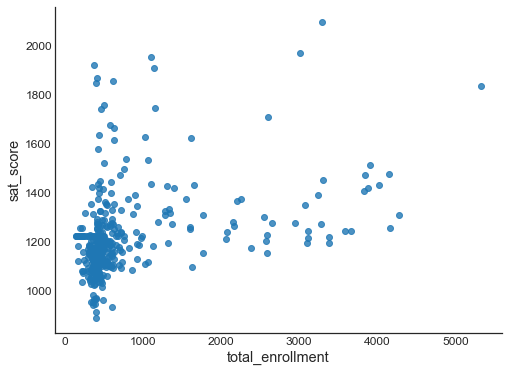

In [58]:
sns.regplot(x='total_enrollment', y='sat_score', data=combined, fit_reg=False)
sns.despine(top=True, right=True)

<b>Looking at the graph, it doesn't feel like there's a strong correlation between the two variables. However, there seems to be a cluster of points densely populated in the bottom left corner of the graph, that cluster must be making the r-value high. Let's futher explore schools that belongs to that cluster.

We'll filter out schools having total_enrollment less that 1000 and sat_score less than 1000.</b>

In [59]:
low_enrollment = (combined
                     .pipe(lambda x:x[x.total_enrollment<1000]) # Filter for total_enrollment(<1000)
                     .pipe(lambda x:x[x.sat_score<1000]) # filter for sat_score(<1000)
                 )
low_enrollment['SCHOOL NAME']

91     INTERNATIONAL COMMUNITY HIGH SCHOOL             
125    ACADEMY FOR LANGUAGE AND TECHNOLOGY             
126    BRONX INTERNATIONAL HIGH SCHOOL                 
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL           
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS           
176    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
179    HIGH SCHOOL OF WORLD CULTURES                   
188    BROOKLYN INTERNATIONAL HIGH SCHOOL              
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
237    IT TAKES A VILLAGE ACADEMY                      
253    MULTICULTURAL HIGH SCHOOL                       
286    PAN AMERICAN INTERNATIONAL HIGH SCHOOL          
Name: SCHOOL NAME, dtype: object

**Googling a little bit further about these schools reveals that most of them are english language learners' schools.**

**It indicated that, it's actally `ell_percent` that strongly correlates with `sat_score` rather than `total_enrollment`.**

**Let us plot, `sat_score` vs `ell_percent` scatter plot.**

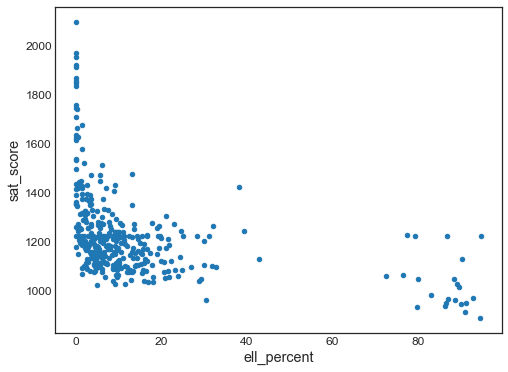

In [60]:
combined.plot.scatter(x='ell_percent', y='sat_score')

<b>There appears to be a linear relation between the two variables by the look at the plot.

It looks like the cluster on the bottom right, the schools with high `ell_percent` and low `sat_score` are the ones we investigated earlier.

Going further, let's map out `ell_percent` by the school district. The map will show us which areas of the city have a lot of english language learners.</b>

In [61]:
from mpl_toolkits.basemap import Basemap

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


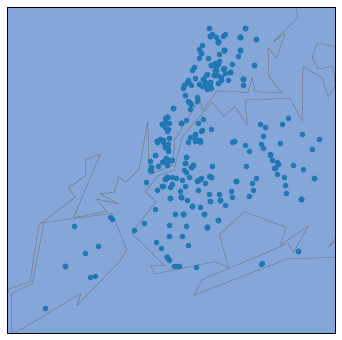

In [62]:
# Setup the map
# 1. Create Basemap instance
# 2. draw map boundaries
# 3. draw coastlines
# 4. draw rivers
m = Basemap(projection='merc',
            llcrnrlat=40.496044,
            urcrnrlat=40.915256,
            llcrnrlon=-74.255735,
            urcrnrlon=-73.700272,
            resolution='i')
m.drawmapboundary(fill_color="#85A6D9")
m.drawcoastlines(color="#6D5F47", linewidth=0.4)
m.drawrivers(color="#6D5F47", linewidth=0.4)
m.scatter(x=combined['lon'].tolist(), y=combined['lat'].tolist(), s=20, zorder=2, latlon=True)

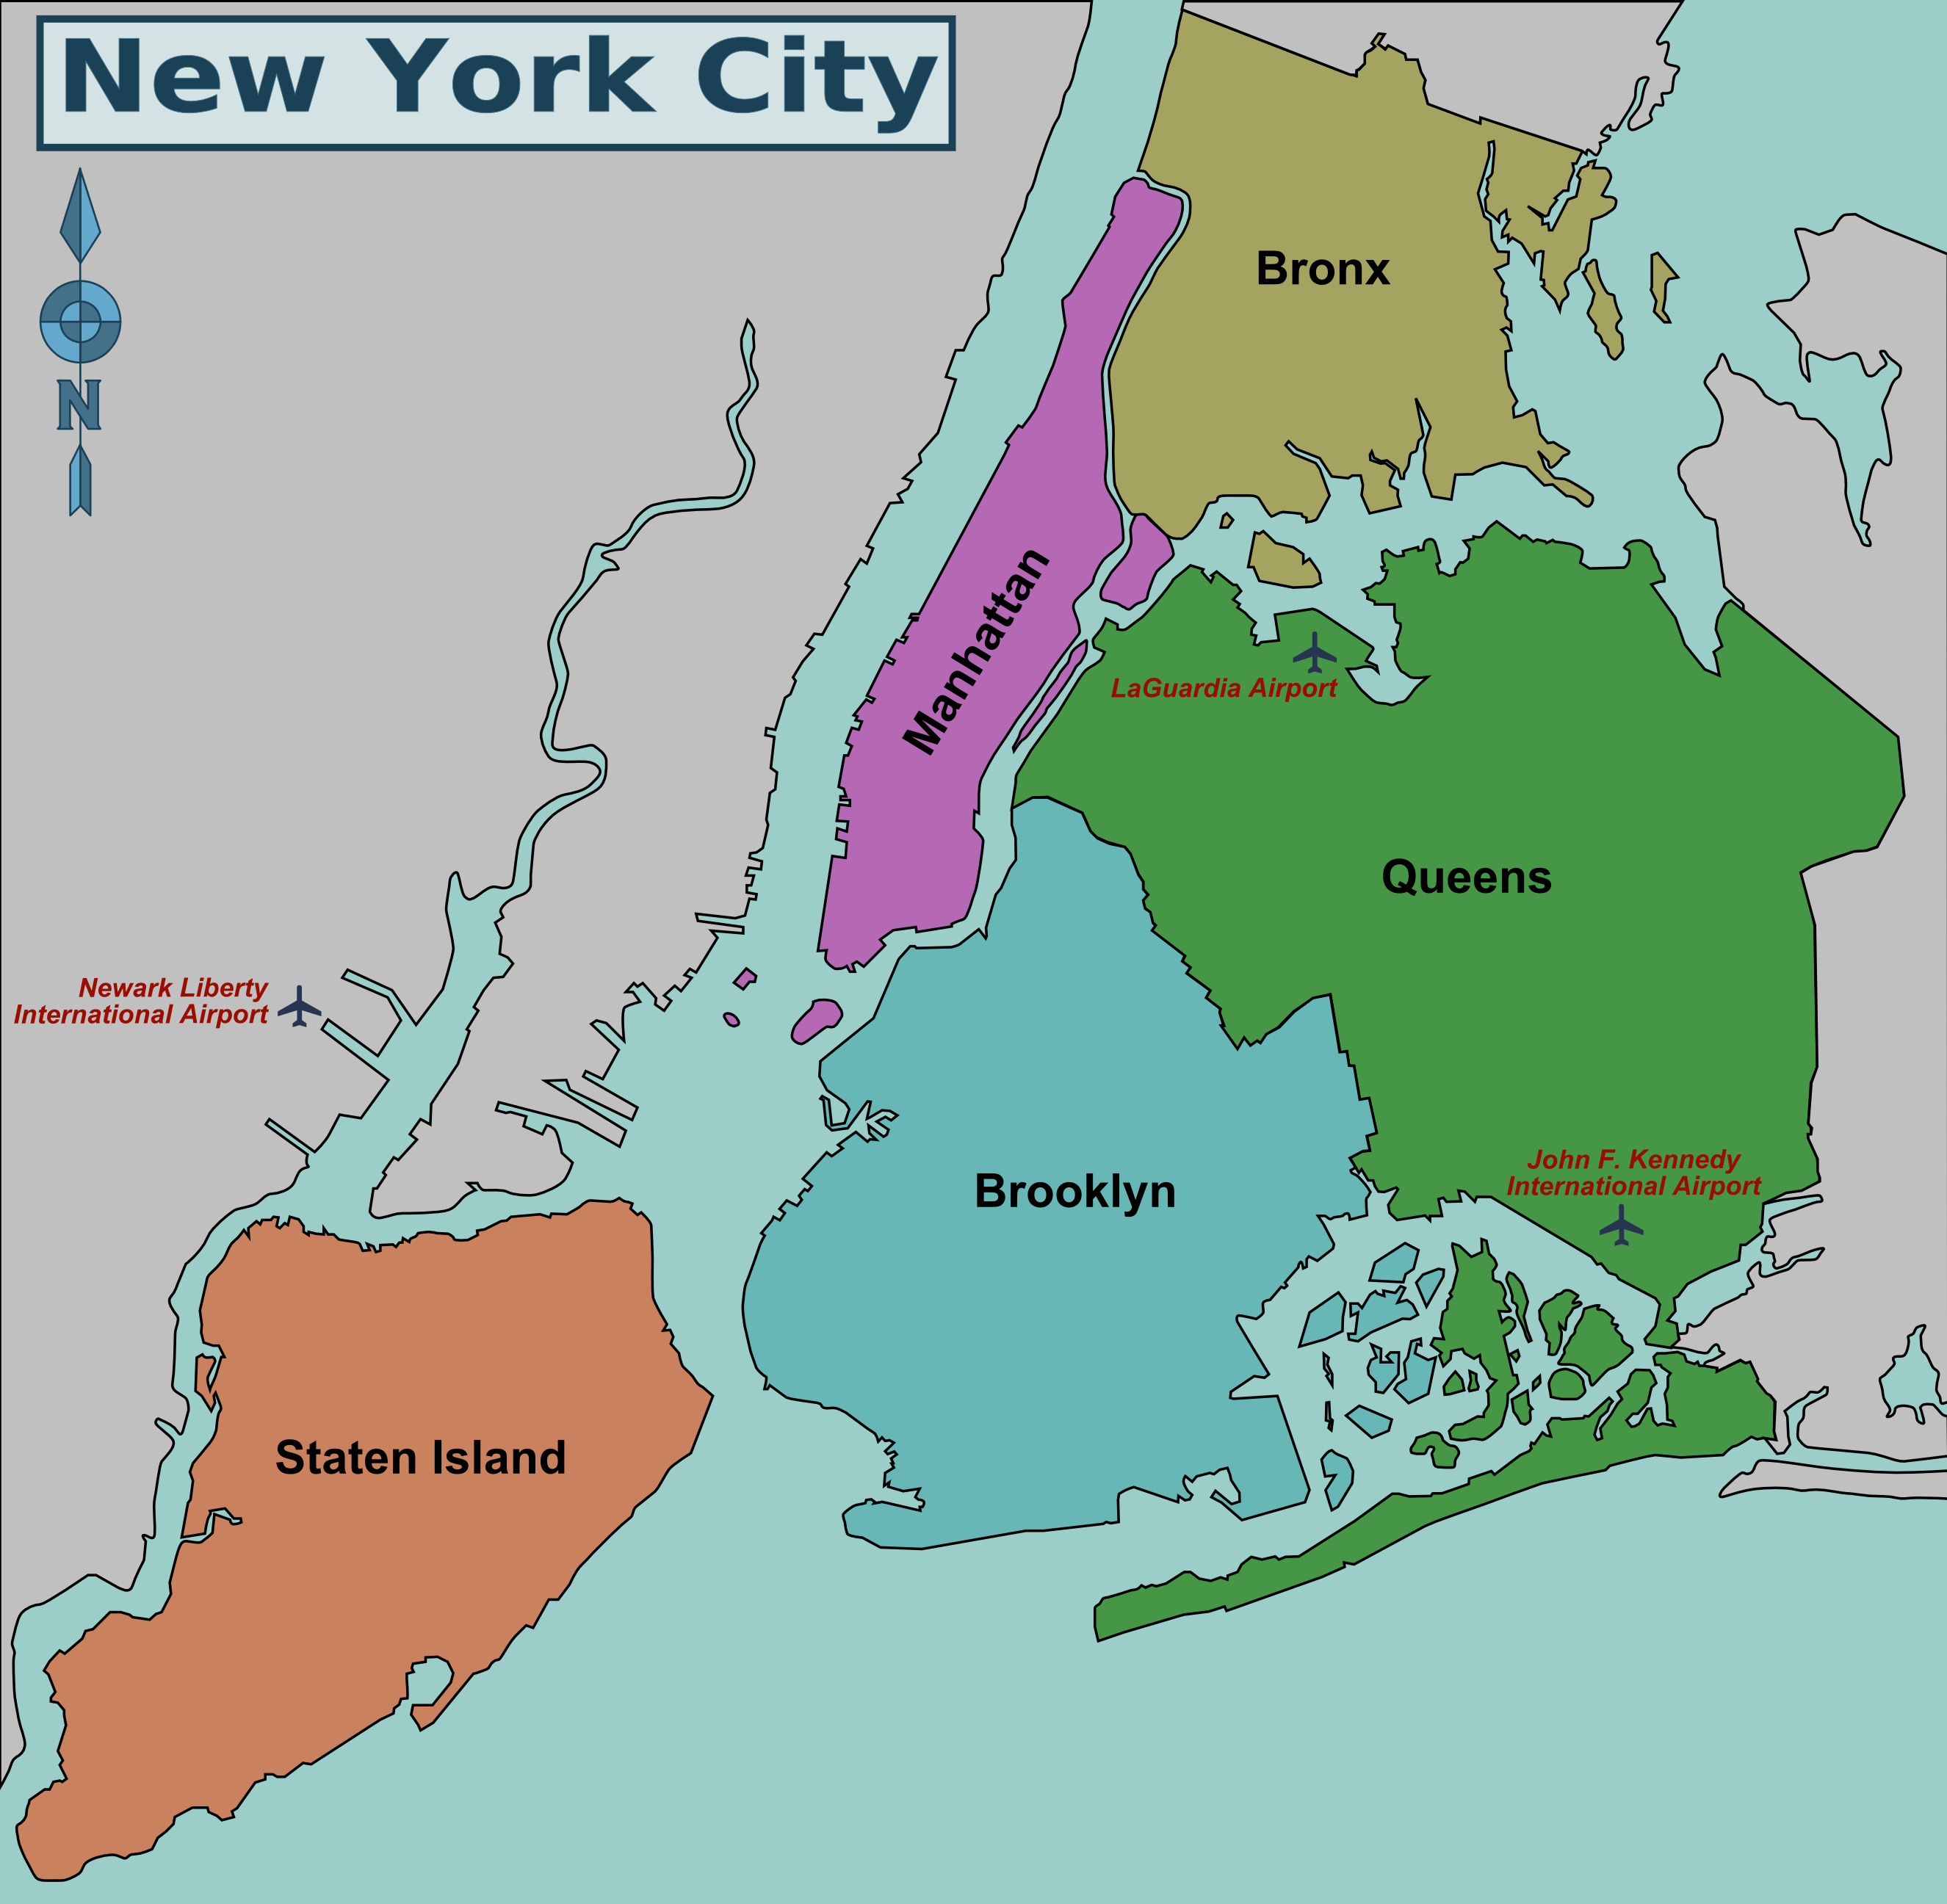

In [63]:
# Actualy NY City Borough's map.
from IPython.display import Image
image_file = "nyc-borough-map.png"
Image(os.path.join(data_dir,image_file), width=400)

<b>A lot of schools are located in the top part of the map, ie. in the Manhatten borough region.</b>

<b>Let us map, the `ell_percent` using the colormap to each school's point.</b>

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


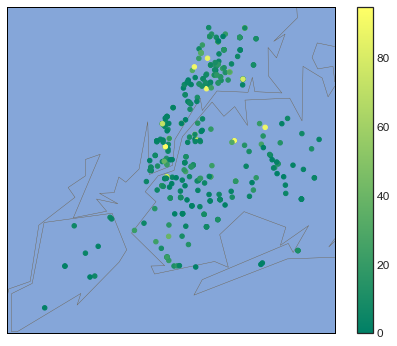

In [64]:
m = Basemap(projection='merc',
            llcrnrlat=40.496044,
            urcrnrlat=40.915256,
            llcrnrlon=-74.255735,
            urcrnrlon=-73.700272,
            resolution='i')
m.drawmapboundary(fill_color="#85A6D9")
m.drawcoastlines(color="#6D5F47", linewidth=0.4)
m.drawrivers(color="#6D5F47", linewidth=0.4)
m.scatter(x=combined['lon'].tolist(),
          y=combined['lat'].tolist(),
          s=20, zorder=2, latlon=True,
          c=combined['ell_percent'],
          cmap='summer')
plt.colorbar() # Plot's the colorbar along side the axes.

<b>Since we have plotted `ell_percent` of all the shcools, the map has become quite crowded by the dots. Some of them even overlaps each other, which makes it hard to interpret the underlying statistics.</b>

<b>Instead of plotting all schools' `ell_percent` let us aggreate the `ell_percent` by each school district and then plot the aggregated data on the map. With this new plotting strategy, since there will be much less points on the map, we'll be able to interpret the statistics more easily than earlier.</b>

In [65]:
districts = combined.groupby(by='school_dist').agg(np.mean).reset_index()

In [66]:
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,115.244241,5.148538,22.675415,18.798392,26.553044,0.0,20112012.0,0.0,58.983333,668.500000,42.166667,10.000000,82.000000,17.083333,134.500000,17.516667,125.500000,22.333333,214.833333,40.733333,186.000000,18.450000,328.166667,50.050000,340.333333,49.950000,76.500000,85.333333,33.166667,525.368056,38.500000,239.166667,8.233333,7.800000,7.683333,8.016667,7.066667,6.233333,6.700000,7.500000,6.768611,6.165787,6.736713,7.446898,7.433333,6.816667,7.116667,7.683333,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,149.818949,5.686360,25.038118,20.662667,28.593861,0.0,20112012.0,0.0,63.164583,605.604167,51.625000,13.006250,70.770833,13.212500,118.395833,14.479167,141.145833,24.733333,271.458333,49.554167,68.541667,10.056250,266.500000,44.718750,339.104167,55.281250,83.312500,86.416667,38.333333,495.171007,31.687500,190.000000,8.254167,7.495833,7.379167,7.704167,7.404167,6.520833,7.120833,7.564583,6.910660,6.204057,6.650422,7.385029,7.520833,6.720833,7.037500,7.541667,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,156.005994,5.839200,23.716311,19.737593,27.122831,0.0,20112012.0,0.0,58.050000,661.416667,36.916667,9.025000,63.583333,14.500000,68.000000,6.408333,181.833333,34.000000,228.250000,44.533333,172.000000,13.725000,272.166667,47.950000,389.250000,52.050000,83.166667,80.833333,36.166667,519.250000,28.166667,206.416667,8.316667,7.541667,7.508333,7.758333,6.675000,5.991667,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,132.362265,5.192610,24.101048,19.740816,27.460291,0.0,20112012.0,0.0,71.000000,569.285714,21.571429,4.557143,58.571429,13.214286,61.142857,6.128571,151.714286,30.028571,341.571429,61.400000,9.285714,1.314286,193.285714,30.514286,376.000000,69.485714,87.571429,92.714286,41.285714,504.857143,32.428571,193.142857,8.385714,7.657143,7.500000,7.928571,7.871429,7.042857,7.428571,7.885714,6.885714,6.114286,6.685714,7.571429,7.714286,6.942857,7.185714,7.785714,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,120.623901,4.845101,24.290247,20.447527,27.746703,0.0,20112012.0,0.0,58.671429,605.857143,21.571429,4.157143,59.714286,10.428571,32.714286,7.300000,342.571429,49.000000,195.571429,36.214286,31.285714,6.714286,300.000000,48.471429,305.857143,51.528571,82.857143,79.285714,40.428571,442.428571,27.714286,184.857143,8.085714,7.342857,7.357143,7.685714,6.857143,5.885714,6.242857,6.957143,6.314286,6.000000,6.428571,7.285714,7.085714,6.414286,6.671429,7.314286,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.9492

By finding means of all columns, we ultimately calculated means of latitudes as well as longitudes which gives us the center of all schools in a particular district. We can use that point to plot the particular `ell_percent` of the associated district on the map.

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'ell_percent')

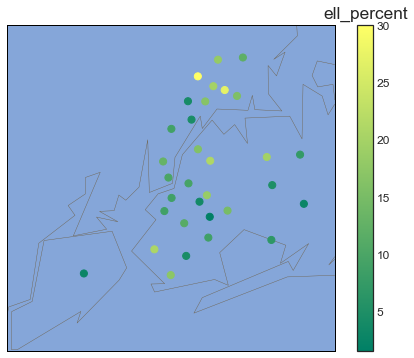

In [67]:
m = Basemap(projection='merc',
            llcrnrlat=40.496044,
            urcrnrlat=40.915256,
            llcrnrlon=-74.255735,
            urcrnrlon=-73.700272,
            resolution='i')
m.drawmapboundary(fill_color="#85A6D9")
m.drawcoastlines(color="#6D5F47", linewidth=0.4)
m.drawrivers(color="#6D5f47", linewidth=0.4)
m.scatter(x=districts['lon'].tolist(), # Longitudes
          y=districts['lat'].tolist(), # Latitudes
          s=50, zorder=2, # Dot size and z-order
          c=districts['ell_percent'], # map ell_percent to colormap
          cmap='summer', # Colormap
          latlon=True # we're passing lat-lons and not axes coordinates.
         )
plt.colorbar().ax.set_title('ell_percent')

### Correlations of Survey fields with sat_score

In [68]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Text(0,0.5,'Corr w/ sat_score')

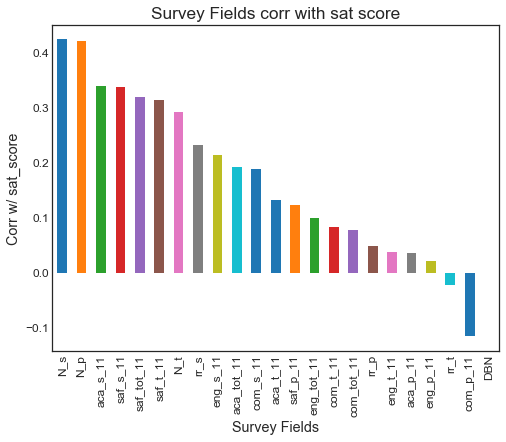

In [69]:
ax=(correlations
    .loc[survey_fields, 'sat_score']
    .sort_values(ascending=False)
    .plot.bar())
ax.set_title("Survey Fields corr with sat score")
ax.set_xlabel("Survey Fields")
ax.set_ylabel("Corr w/ sat_score")

<b>Students' ratings for academic expectations of school as well as safety and respect at school highly correlates with the sat scores. But the same is not true about teachers ratings. Teachers ratings of school safety are correlating with the sat scores of students at the school.</b>

<b>That is to say, how teachers and students perceive safety at schools reflects into sat score.</b>

Let's dig deeper into these correlating variables:



In [70]:
import seaborn as sns
sns.set_style('dark')
sns.__version__

'0.8.0'

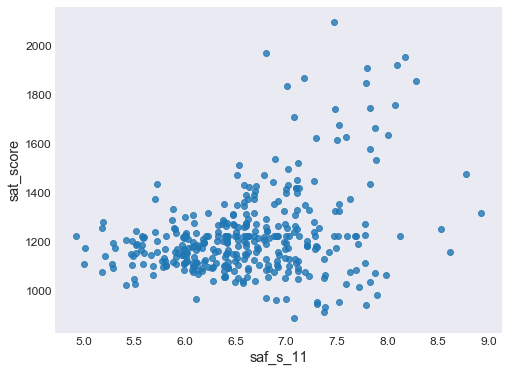

In [71]:
ax = sns.regplot(x='saf_s_11', y='sat_score', data=combined,fit_reg=False, x_jitter=0.03)

**There doesn't appear to be a strong linear relation between the students' safety ratings and sat scores. However, the cluster of schools having students' safety rating about 5 through 7 seem to have caused a high correlation between two variables.**

**Schools with high safety ratings have sat scores spread over 1400 to 2100.**

**Let us map, average safety scores of each district onto the geographical map of NewYork City.**

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'Safety Score')

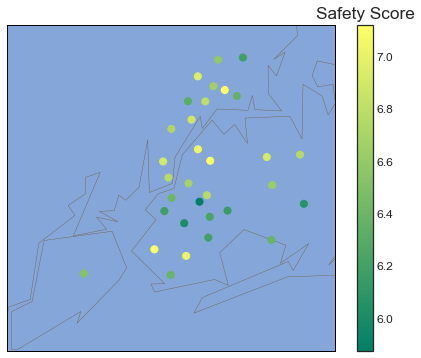

In [72]:
# We have aggregated data stored in `districts` variable.
sns.set_style('white')
# Prepare map
mp = Basemap(projection='merc',
             llcrnrlat=40.496044,
             urcrnrlat=40.915256,
             llcrnrlon=-74.255735,
             urcrnrlon=-73.700272,
             resolution='i')
mp.drawmapboundary(fill_color="#85A6D9")
mp.drawcoastlines(color="#6D5F47", linewidth=0.4)
mp.drawrivers(color="#6D5f47", linewidth=0.4)

# Plot the aggregated data of safety score on the map
mp.scatter(x=districts['lon'].tolist(),
           y=districts['lat'].tolist(),
           s=50, zorder=2,
           c=districts['saf_s_11'],
           cmap='summer',
           latlon=True)
plt.colorbar().ax.set_title('Safety Score')

/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/mayur/anaconda3/envs/Python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


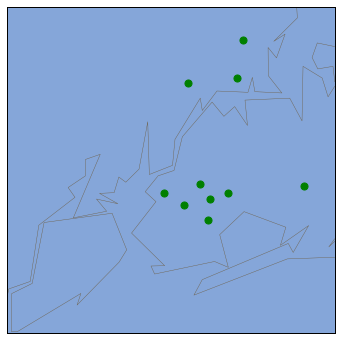

In [73]:
# Let's plot lowest 10 districts on scale of students' safety score.
mp = Basemap(projection='merc',
             llcrnrlat=40.496044,
             urcrnrlat=40.915256,
             llcrnrlon=-74.255735,
             urcrnrlon=-73.700272,
             resolution='i')
mp.drawmapboundary(fill_color="#85A6D9")
mp.drawcoastlines(color="#6D5F47", linewidth=0.4)
mp.drawrivers(color="#6D5f47", linewidth=0.4)

# Lowest 10 districst
lowest_ten = districts.sort_values(by='saf_s_11', ascending=False).iloc[-10:,]
# Plot the aggregated data of safety score on the map
mp.scatter(x=lowest_ten['lon'].tolist(),
           y=lowest_ten['lat'].tolist(),
           s=50, zorder=2,
           c='green',
           latlon=True)

**Six of the lowest 10 school_districts on the scale of students' safety score are in brooklyn. That tells a lot about students' safetey perception of schools in Brooklyn. Schools in brooklyn are not safe for students from their own perspective and hence they are less likely to perform better when it comes to SAT exam.**

### Racial differences in SAT scores

In [74]:
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

Text(0.5,1,'Racial % correlation with SAT score')

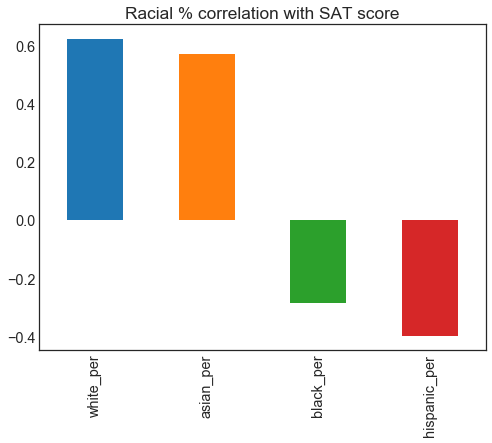

In [75]:
races = ['white_per',
         'asian_per',
         'black_per',
         'hispanic_per']
correlations['sat_score'][races].plot.bar().set_title("Racial % correlation with SAT score")

**This is unexpected. Absolutely unexpected. Schools with higher percentage of white or asian students are highly correlated with the SAT score, while schools with higher percentages of black or hispanic are inversly correlated.**

Let's investigate a little further the hispanic percentage and sat score relationship:

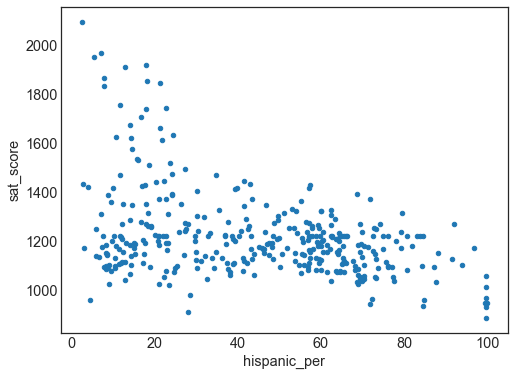

In [76]:
combined.plot.scatter(x='hispanic_per', y='sat_score')


**Although there doesn't seem to be a strictly linear relation between the hispanic percentage and sat score, the schools with low % that have performed well on SAT exams may have caused the higher magnitude in negative correlation of hispanic % with the SAT score.**

**However, we should not forget that there definitely is a negative correlation between hispanic percentage and sat_score.**

**Let's find the schools with more than 95% of students being Hispanic:**

In [77]:
combined.loc[combined['hispanic_per']>95, ['SCHOOL NAME', 'hispanic_per', 'ell_percent']]

,SCHOOL NAME,hispanic_per,ell_percent
44,MANHATTAN BRIDGES HIGH SCHOOL,99.8,72.6
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,96.7,19.6
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS,99.8,89.6
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,99.4,86.6
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,99.8,79.9
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,99.8,92.9
253,MULTICULTURAL HIGH SCHOOL,99.8,94.6
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,100.0,91.3


**As you can see, most of the schools with very high hispanic students percentages do also have high english learners' percentages. and that could be a factor contributing to their low SAT score performance. Because earlier we saw that schools with high percentage of english language learners tend to perform poorly on SAT exams.**

**Let's also take a look at schools with very low hispanic student's percentage, which alos performed outstandingly in SAT exam.**

In [78]:
pd.options.display.max_colwidth = -1
# We'll set percentage bound to 10% and SAT score bound to 1800.
combined.loc[combined.hispanic_per < 10, ['SCHOOL NAME', 'hispanic_per', 'ell_percent']]

,SCHOOL NAME,hispanic_per,ell_percent
37,STUYVESANT HIGH SCHOOL,2.4,0.0
46,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,4.0,38.2
151,BRONX HIGH SCHOOL OF SCIENCE,7.2,0.1
187,BROOKLYN TECHNICAL HIGH SCHOOL,7.9,0.1
192,BEDFORD ACADEMY HIGH SCHOOL,7.1,1.1
194,BENJAMIN BANNEKER ACADEMY,8.8,0.0
220,BOYS AND GIRLS HIGH SCHOOL,7.8,2.5
223,ACADEMY FOR COLLEGE PREPARATION AND CAREER EXPLORATION: A COLLEGE BOARD SCHOOL,6.7,5.0
226,THE HIGH SCHOOL FOR GLOBAL CITIZENSHIP,7.3,5.2
227,"SCHOOL FOR HUMAN RIGHTS, THE",8.3,6.2


**We found earlier that, schools that have higher percentage of hispanic students also have higher percentages of english language learners. And now from above table, it is clear that, schools with low percentage of 'hispanic' students have low English language learners' percentage.**

**From this we can say that, `hispanic_per` and `ell_percent` must have high positive correlation between them.**

**And since `ell_percent` have negative correlation with the `sat_score`, `hispanic_per` also must have negative correlation with `sat_score` variable.**

**We can conclude that most of the hispanic's are english language learnes and that is why they perform poor on SAT exams.**

### Genders

Let us plot the difference in:
- corr between male percentage and sat_score

and 

- corr between female percentage and sat_score

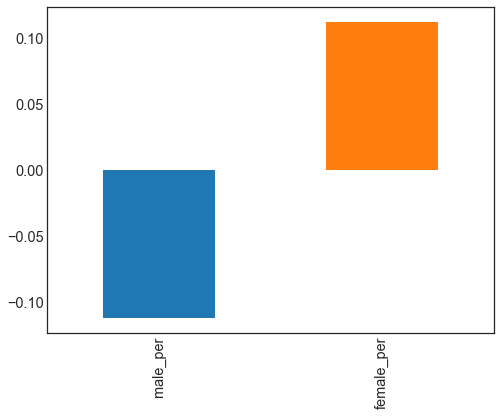

In [79]:
ax = correlations.loc[['male_per', 'female_per'], 'sat_score'].plot.bar()

**Although, there isn't any strong positive or negative correlation between either gender percentage and sat_score, the schools with mostly females have a little more edge over doing better in SAT than the schools with mostly males.**

**Basically, if you are in a mostly female students' school in NY, then you are more likely to perform better in SAT score than you were in a school with mostly males students.**

Let's further investigate the relation between female percentage and SAT score:

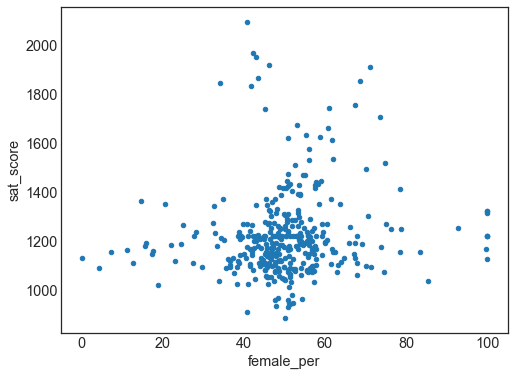

In [80]:
# Scatter plot female_per vs sat_score
ax = combined.plot.scatter(x='female_per', y='sat_score')

**Most of the schools are clustered around a point where female percentage is around 50% and SAT score of around 1200. From the scatterplot, there does not appear to be any linear or non linear relationship between the two variables - female_percent and sat_score.**

Let us see if we find any different pattern in the scatterplot when we filter out schools with female percentage less than or equl to 60 and sat score below 1700.

In [81]:
combined.loc[(combined.female_per>60)&(combined.sat_score>1700),'SCHOOL NAME']

5      BARD HIGH SCHOOL EARLY COLLEGE                                      
26     ELEANOR ROOSEVELT HIGH SCHOOL                                       
60     BEACON HIGH SCHOOL                                                  
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS
302    TOWNSEND HARRIS HIGH SCHOOL                                         
Name: SCHOOL NAME, dtype: object

### AP Test takers

Let us calculate from the number of AP test takers, the percent of AP test takers using the total_enrollment column.

`ap percent = (ap test takers)/(total enrollment)`

In [82]:
# Percentage of students in school who took an AP exam.
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

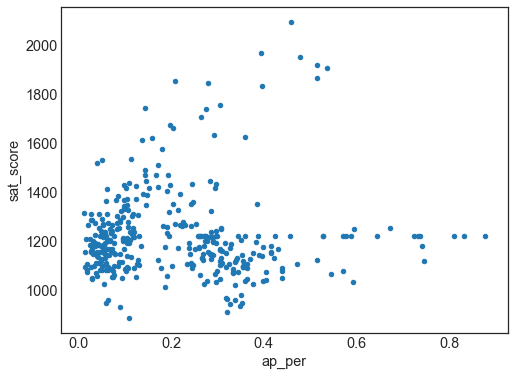

In [83]:
combined.plot.scatter(x='ap_per', y='sat_score')

In [84]:
# Correlation between ap percent and sat score.
combined[['ap_per', 'sat_score']].corr()['sat_score']

ap_per       0.057171
sat_score    1.000000
Name: sat_score, dtype: float64

**There doesn't appear to be any strong linear relationship between ap test takers' percent and the associated school's sat_score.**

### Future steps:
- Determining correlation between class size and SAT score.
- Figuring out which neighborhoods has the best schools:
    - There's a chance that this data can be combined with the property value data and can be found out which least expensive neighborhoods with good schools.
- Investigating differences between parent, teacher and students' responses to the surveys.
- Assigning scores to schools based of `SAT Score` and other attributes.